# 

In [15]:
import catalog as Cat
import observables as Obvs
import util as UT

In [25]:
import matplotlib.pyplot as plt
% matplotlib inline
from ChangTools.plotting import prettyplot
from ChangTools.plotting import prettycolors
prettyplot()
pretty_colors = prettycolors()

## Load in SDSS Group Catalog

In [26]:
real = Cat.Observations('group_catalog', Mrcut=18, position='central')
catalog = real.Read()

In [27]:
print sorted(catalog.keys())

['dec', 'mass', 'ra', 'sfr', 'ssfr', 'z']


In [28]:
# examine P(SSFR) of group catalog
Pssfr = Obvs.Ssfr()
ssfr_mid, pssfr = Pssfr.Calculate(catalog['mass'], catalog['ssfr'])

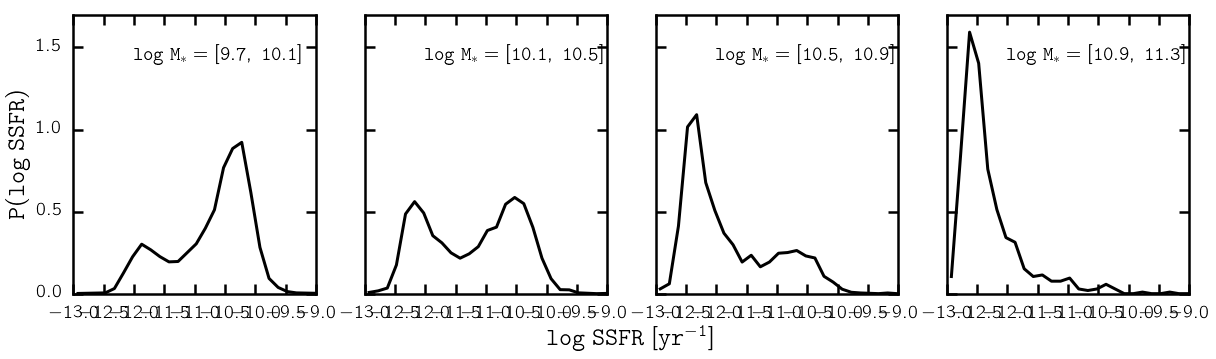

In [29]:
fig = plt.figure(figsize=(20, 5))
bkgd = fig.add_subplot(111, frameon=False)

panel_mass_bins = [[9.7, 10.1], [10.1, 10.5], [10.5, 10.9], [10.9, 11.3]]
for i_m, mass_bin in enumerate(panel_mass_bins): 
    sub = fig.add_subplot(1, 4, i_m+1)
    
    sub.plot(ssfr_mid[i_m], pssfr[i_m], lw=3, ls='-', c='k')
            
    # mark the SSFR of SFMS and Quiescent peak 
    #sub.vlines(Obvs.SSFR_SFMS(0.5 * np.sum(mass_bin), UT.z_nsnap(20), theta_SFMS=theta['sfms']), 0., 1.7, 
    #           color='b', linewidth=3)
    #sub.vlines(Obvs.SSFR_Qpeak(0.5 * np.sum(mass_bin)), 0., 1.7, 
    #           color='r', linewidth=3)

    massbin_str = ''.join([r'$\mathtt{log \; M_{*} = [', 
                           str(mass_bin[0]), ',\;', str(mass_bin[1]), ']}$'])
    sub.text(-12., 1.4, massbin_str, fontsize=20)
        
    # x-axis
    sub.set_xlim([-13., -9.])
    # y-axis 
    sub.set_ylim([0.0, 1.7])
    sub.set_yticks([0.0, 0.5, 1.0, 1.5])
    if i_m == 0: 
        sub.set_ylabel(r'$\mathtt{P(log \; SSFR)}$', fontsize=25) 
    else: 
        sub.set_yticklabels([])
bkgd.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')
bkgd.set_xlabel(r'$\mathtt{log \; SSFR \;[yr^{-1}]}$', fontsize=25) 
plt.show()

### Mark $SFR_{cut}$ on $P(SSFR)$

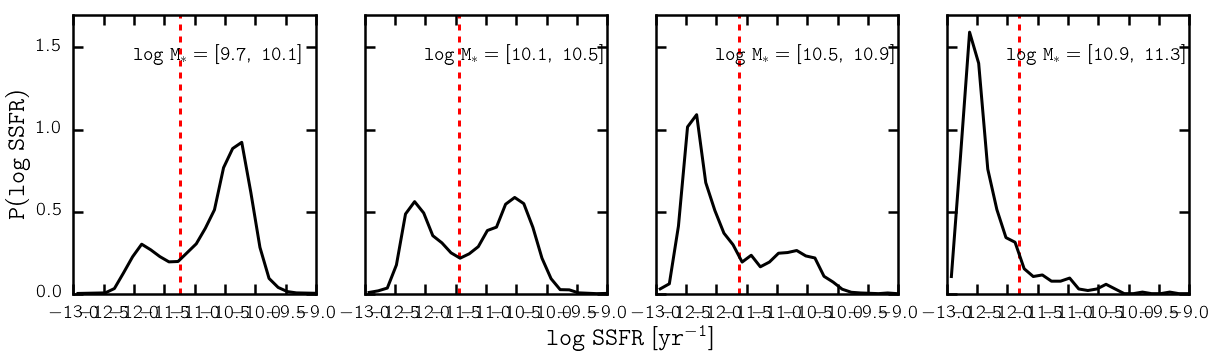

In [30]:
theta_sfms = {'name': 'linear', 'zslope': 1.14}

qf = Obvs.Fq()

fig = plt.figure(figsize=(20, 5))
bkgd = fig.add_subplot(111, frameon=False)

panel_mass_bins = [[9.7, 10.1], [10.1, 10.5], [10.5, 10.9], [10.9, 11.3]]
for i_m, mass_bin in enumerate(panel_mass_bins): 
    sub = fig.add_subplot(1, 4, i_m+1)
    
    sub.plot(ssfr_mid[i_m], pssfr[i_m], lw=3, ls='-', c='k')
            
    # mark the SSFR of SFMS and Quiescent peak 
    sub.vlines(qf.SFRcut(0.5 * np.sum(mass_bin), np.median(catalog['z']), theta_SFMS=theta_sfms) - 0.5 * np.sum(mass_bin), 0., 1.7, 
               color='r', linestyle='--', linewidth=3)
    #sub.vlines(Obvs.SSFR_Qpeak(0.5 * np.sum(mass_bin)), 0., 1.7, 
    #           color='r', linewidth=3)

    massbin_str = ''.join([r'$\mathtt{log \; M_{*} = [', 
                           str(mass_bin[0]), ',\;', str(mass_bin[1]), ']}$'])
    sub.text(-12., 1.4, massbin_str, fontsize=20)
        
    # x-axis
    sub.set_xlim([-13., -9.])
    # y-axis 
    sub.set_ylim([0.0, 1.7])
    sub.set_yticks([0.0, 0.5, 1.0, 1.5])
    if i_m == 0: 
        sub.set_ylabel(r'$\mathtt{P(log \; SSFR)}$', fontsize=25) 
    else: 
        sub.set_yticklabels([])
bkgd.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')
bkgd.set_xlabel(r'$\mathtt{log \; SSFR \;[yr^{-1}]}$', fontsize=25) 

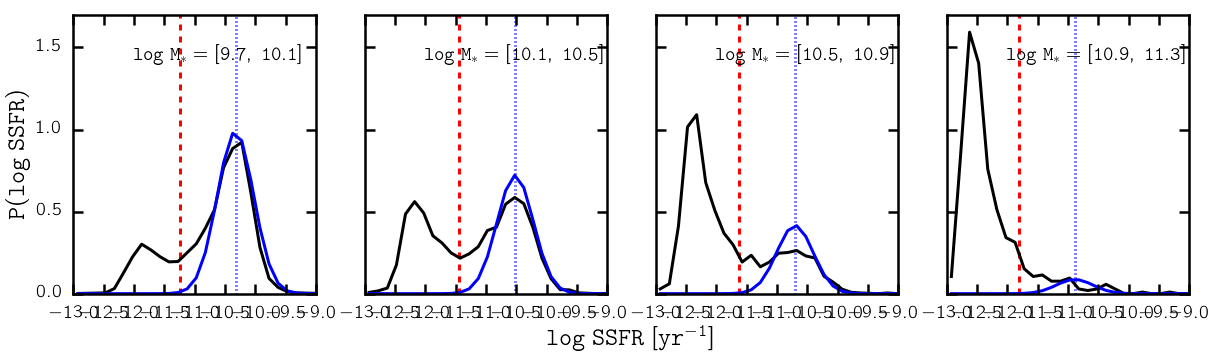

In [40]:
theta_sfms = {'name': 'linear', 'zslope': 1.14}

qf = Obvs.Fq()

gauss = lambda xx, mu, sig: 1/(sig * np.sqrt(2 * np.pi)) * np.exp( - (xx - mu)**2 / (2 * sig**2) )

fig = plt.figure(figsize=(20, 5))
bkgd = fig.add_subplot(111, frameon=False)

panel_mass_bins = [[9.7, 10.1], [10.1, 10.5], [10.5, 10.9], [10.9, 11.3]]
for i_m, mass_bin in enumerate(panel_mass_bins): 
    sub = fig.add_subplot(1, 4, i_m+1)
    
    sub.plot(ssfr_mid[i_m], pssfr[i_m], lw=3, ls='-', c='k')
            
    # mark the SSFR of SFMS and Quiescent peak 
    sub.vlines(qf.SFRcut(0.5 * np.sum(mass_bin), np.median(catalog['z']), theta_SFMS=theta_sfms) - 0.5 * np.sum(mass_bin), 0., 1.7, 
               color='r', linestyle='--', linewidth=3)
    sub.vlines(Obvs.SSFR_SFMS(0.5 * np.sum(mass_bin), UT.z_nsnap(1), theta_SFMS=theta_sfms), 0., 1.7, 
               color='b', linestyle=':', linewidth=3)
    sub.plot(ssfr_mid[i_m], 
             0.9*(1. - qf.model(0.5 * np.sum(mass_bin), UT.z_nsnap(1), lit='cosmos_tinker')) *\
             gauss(ssfr_mid[i_m], Obvs.SSFR_SFMS(0.5 * np.sum(mass_bin), UT.z_nsnap(1), theta_SFMS=theta_sfms), 0.3),
             c='b', lw=3)
    #sub.vlines(Obvs.SSFR_Qpeak(0.5 * np.sum(mass_bin)), 0., 1.7, 
    #           color='r', linewidth=3)

    massbin_str = ''.join([r'$\mathtt{log \; M_{*} = [', 
                           str(mass_bin[0]), ',\;', str(mass_bin[1]), ']}$'])
    sub.text(-12., 1.4, massbin_str, fontsize=20)
        
    # x-axis
    sub.set_xlim([-13., -9.])
    # y-axis 
    sub.set_ylim([0.0, 1.7])
    sub.set_yticks([0.0, 0.5, 1.0, 1.5])
    if i_m == 0: 
        sub.set_ylabel(r'$\mathtt{P(log \; SSFR)}$', fontsize=25) 
    else: 
        sub.set_yticklabels([])
bkgd.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')
bkgd.set_xlabel(r'$\mathtt{log \; SSFR \;[yr^{-1}]}$', fontsize=25) 

In [41]:
from scipy.optimize import curve_fit

0.140189168568
0.142287881124
0.123641154064
0.0225454812729


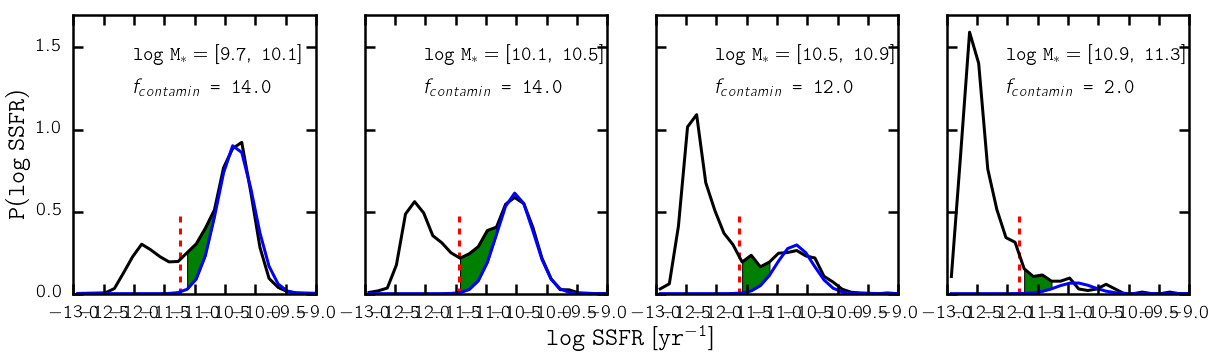

In [60]:
fig = plt.figure(figsize=(20, 5))
bkgd = fig.add_subplot(111, frameon=False)

panel_mass_bins = [[9.7, 10.1], [10.1, 10.5], [10.5, 10.9], [10.9, 11.3]]
for i_m, mass_bin in enumerate(panel_mass_bins): 
    sub = fig.add_subplot(1, 4, i_m+1)
    
    sub.plot(ssfr_mid[i_m], pssfr[i_m], lw=3, ls='-', c='k')
            
    # mark the SSFR of SFMS and Quiescent peak 
    sub.vlines(qf.SFRcut(0.5 * np.sum(mass_bin), np.median(catalog['z']), theta_SFMS=theta_sfms) - 0.5 * np.sum(mass_bin), 0., 0.5, 
               color='r', linestyle='--', linewidth=3)
    #sub.vlines(Obvs.SSFR_SFMS(0.5 * np.sum(mass_bin), UT.z_nsnap(1), theta_SFMS=theta_sfms) - 0.3, 0., 1.7, 
    #           color='b', linestyle=':', linewidth=3)    
    sfms_lim = np.where(ssfr_mid[i_m] > Obvs.SSFR_SFMS(0.5 * np.sum(mass_bin), UT.z_nsnap(1), theta_SFMS=theta_sfms) - 0.3)
    
    sfms_curve = lambda xx, A: A *  gauss(xx, Obvs.SSFR_SFMS(0.5 * np.sum(mass_bin), UT.z_nsnap(1), theta_SFMS=theta_sfms), 0.3)
    
    A_opt, A_cov = curve_fit(sfms_curve, ssfr_mid[i_m][sfms_lim], pssfr[i_m][sfms_lim], p0=0.8)
    
    print (1. - qf.model(0.5 * np.sum(mass_bin), UT.z_nsnap(1), lit='cosmos_tinker')) - A_opt[0]
    sub.plot(ssfr_mid[i_m], 
             A_opt[0] * gauss(ssfr_mid[i_m], Obvs.SSFR_SFMS(0.5 * np.sum(mass_bin), UT.z_nsnap(1), theta_SFMS=theta_sfms), 0.3),
             c='b', lw=3)
    
    contamin = np.where(
        (ssfr_mid[i_m] >= qf.SFRcut(0.5 * np.sum(mass_bin), np.median(catalog['z']), theta_SFMS=theta_sfms) - 0.5 * np.sum(mass_bin)) & 
        (ssfr_mid[i_m] < Obvs.SSFR_SFMS(0.5 * np.sum(mass_bin), UT.z_nsnap(1), theta_SFMS=theta_sfms) - 0.3))
    sub.fill_between(ssfr_mid[i_m][contamin], 
                     A_opt[0] * gauss(ssfr_mid[i_m][contamin], Obvs.SSFR_SFMS(0.5 * np.sum(mass_bin), UT.z_nsnap(1), theta_SFMS=theta_sfms), 0.3),
                     pssfr[i_m][contamin], color='g', edgecolor=None)

    #sub.vlines(Obvs.SSFR_Qpeak(0.5 * np.sum(mass_bin)), 0., 1.7, 
    #           color='r', linewidth=3)

    massbin_str = ''.join([r'$\mathtt{log \; M_{*} = [', 
                           str(mass_bin[0]), ',\;', str(mass_bin[1]), ']}$'])
    sub.text(-12., 1.4, massbin_str, fontsize=20)
    sub.text(-12., 1.2, 
             ''.join([
                 '$f_{contamin}$ = ', 
                 str(100.*round((1. - qf.model(0.5 * np.sum(mass_bin), UT.z_nsnap(1), lit='cosmos_tinker')) - A_opt[0],2)), 
                 '%'
             ]), fontsize=20)
        
    # x-axis
    sub.set_xlim([-13., -9.])
    # y-axis 
    sub.set_ylim([0.0, 1.7])
    sub.set_yticks([0.0, 0.5, 1.0, 1.5])
    if i_m == 0: 
        sub.set_ylabel(r'$\mathtt{P(log \; SSFR)}$', fontsize=25) 
    else: 
        sub.set_yticklabels([])
bkgd.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')
bkgd.set_xlabel(r'$\mathtt{log \; SSFR \;[yr^{-1}]}$', fontsize=25) 